<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/OfficialSeabornTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Motivation
業務で機械学習を利用した新機能を画策中  
現在も１つ提案している。職場において機械学習の理解者がゼロなので、
アウトプットの説明力を強化する必要があると感じる。企画も通りやすくなる。  
取り合えず、serbornの様々な図の表現方法を学ぶことで資料（データ）の説明力を強化したい。

[参考URL](https://seaborn.pydata.org/tutorial.html)


# 統計的関係の視覚化


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

#### 変数を散布図に関連付ける
2つの変数の共同分布を示します

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


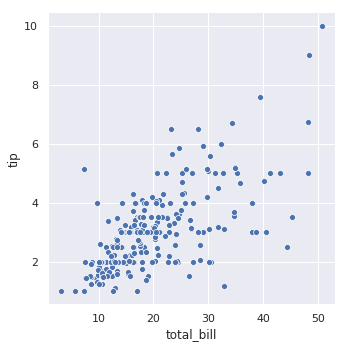

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips)

ポイントは2次元でプロットされますが、3番目の変数に従ってポイントに色を付けることで、  
別のディメンションをプロットに追加できます。   
Seabornでは、これは「色相セマンティック」の使用と呼ばれます。これは、ポイントの色に意味が得られるためです。

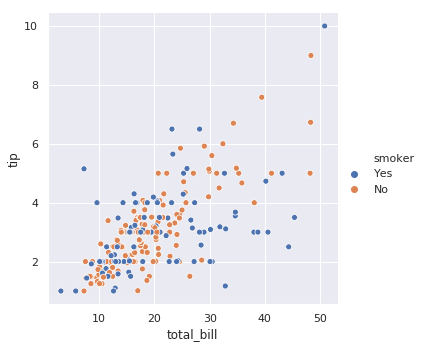

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

クラス間の違いを強調し、アクセシビリティを向上させるために、クラスごとに異なるマーカースタイルを使用できます。

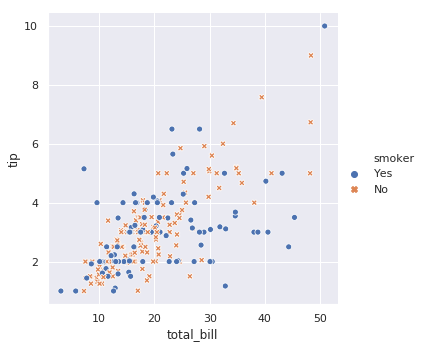

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips);

各ポイントの色相とスタイルを個別に変更することにより、4つの変数を表すこともできます。  
しかし、目は色よりも形に敏感であるため、これは慎重に行う必要があります。

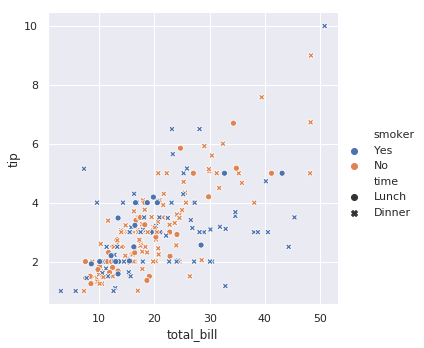

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

上記の例では、色相のセマンティックはカテゴリカルであったため、デフォルトの定性パレットが適用されました。  
色相のセマンティクスが数値の場合（具体的には、floatにキャストできる場合）、デフォルトのカラーリングは順次パレットに切り替わります

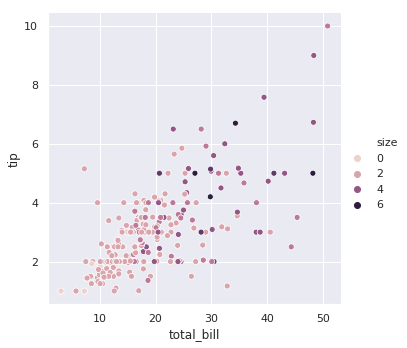

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

どちらの場合でも、カラーパレットをカスタマイズできます。  
そうするための多くのオプションがあります。  
ここでは、cubehelix_palette（）への文字列インターフェイスを使用して、シーケンシャルパレットをカスタマイズします。

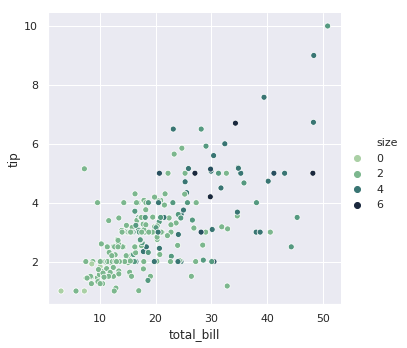

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips)


3番目の種類のセマンティック変数は、各ポイントのサイズを変更します。

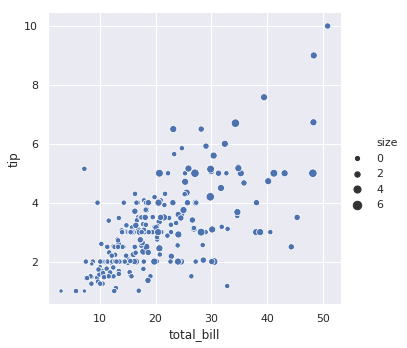

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

matplotlib.pyplot.scatter（）とは異なり、変数のリテラル値はポイントの領域を選択するために使用されません。  
代わりに、データ単位の値の範囲は、面積単位の範囲に正規化されます。この範囲はカスタマイズできます

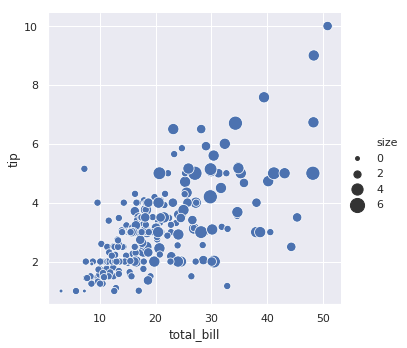

In [11]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

さまざまなセマンティクスを使用して統計的な関係を示す方法をカスタマイズするためのその他の  
例は、scatterplot（）APIの例に示されています

#### ラインプロットで連続性を強調する
散布図は非常に効果的ですが、普遍的に最適な視覚化のタイプはありません。  
代わりに、視覚的表現は、データセットの詳細とプロットで答えようとしている質問に適合させる必要があります。

In [12]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,0.328405
1,1,1.171968
2,2,0.969673
3,3,2.142148
4,4,2.005070


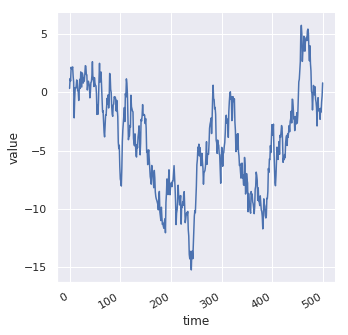

In [13]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

lineplot（）は、最も頻繁にyをxの関数として描画しようとしていると想定しているため、  
デフォルトの動作では、プロットする前にx値でデータをソートします。ただし、これは無効にできます。

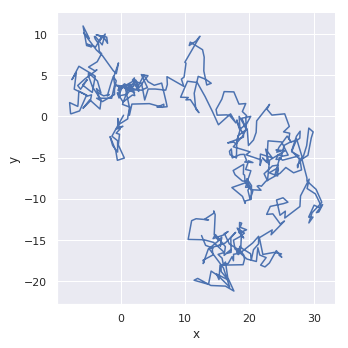

In [14]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

#### 集計と不確実性の表現
より複雑なデータセットでは、x変数の同じ値に対して複数の測定値があります。  
seabornのデフォルトの動作では、平均と平均の周りの95％信頼区間をプロットすることにより、各x値で複数の測定値を集約します。

In [15]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


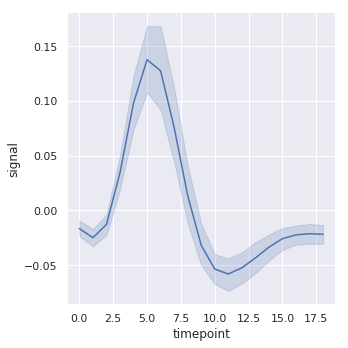

In [16]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

信頼区間は、ブートストラップを使用して計算されます。  
これは、大規模なデータセットでは時間がかかる場合があります。したがって、それらを無効にすることができます。

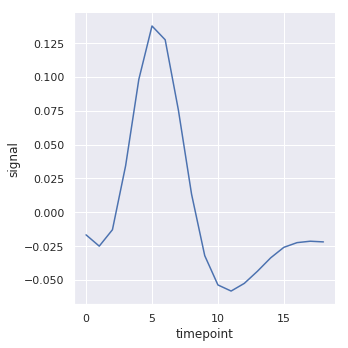

In [17]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

特に大きなデータの場合、信頼区間の代わりに標準偏差をプロットすることにより、  
各時点での分布の広がりを表すこともできます。

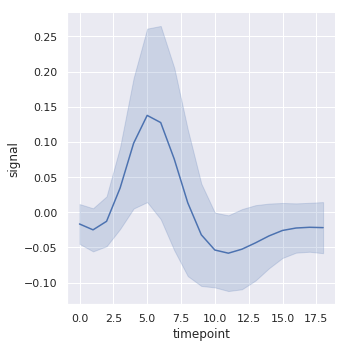

In [18]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

集計を完全にオフにするには、推定器パラメーターを[なし]に設定します。  
これにより、データに各ポイントで複数の観測がある場合、奇妙な効果が生じる可能性があります。

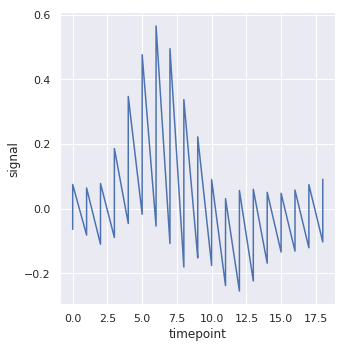

In [19]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

#### セマンティックマッピングを使用したデータのサブセットのプロット
lineplot（）関数にはscatterplot（）と同じ柔軟性があります  
プロット要素の色相、サイズ、スタイルを変更することにより、最大3つの追加変数を表示できます。  
これは、scatterplot（）と同じAPIを使用して行われます。つまり、matplotlibの線と点の外観を制御するパラメーターを停止して考える必要はありません。

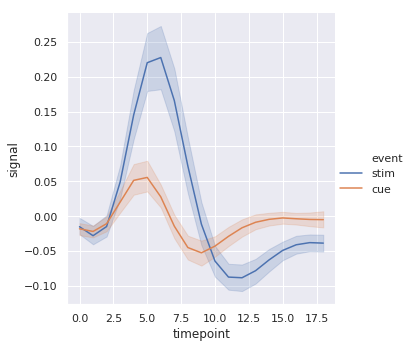

In [20]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

線プロットにスタイルセマンティックを追加すると、デフォルトで線のダッシュのパターンが変更されます。

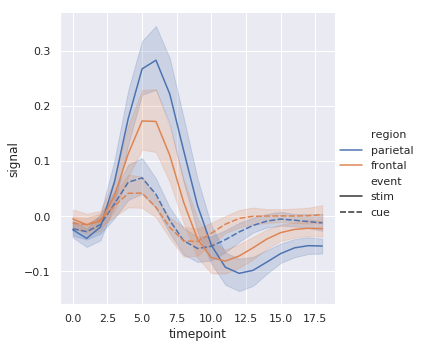

In [21]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri);

ただし、各観測で使用されるマーカーによって、ダッシュと一緒に、またはそれらの代わりにサブセットを識別できます。

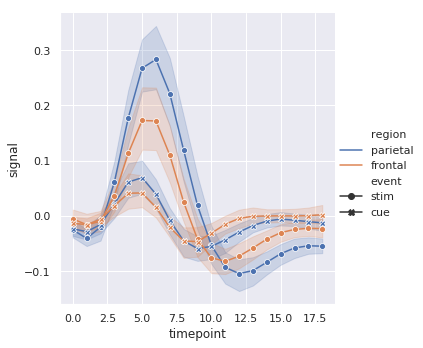

In [22]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

散布図と同様に、複数のセマンティクスを使用してラインプロットを作成する場合は注意が必要です。情報を提供することもありますが、解析と解釈が困難な場合もあります。ただし、1つの追加変数の変更のみを調べている場合でも、線の色とスタイルの両方を変更すると便利です。これにより、白黒で印刷したり、色覚異常のある人が見たりしたときに、プロットがよりアクセスしやすくなります。

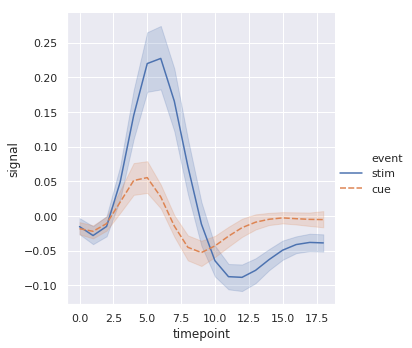

In [23]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

反復測定データで作業している場合（つまり、複数回サンプリングされたユニットがある場合）、セマンティクスで区別せずに各サンプリングユニットを個別にプロットすることもできます。これにより、凡例が乱雑になりません。

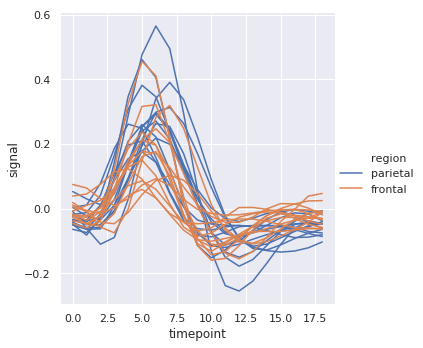

In [24]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

デフォルトのカラーマップとlineplot（）の凡例の処理は、色相の意味がカテゴリカルか数値かによっても異なります。

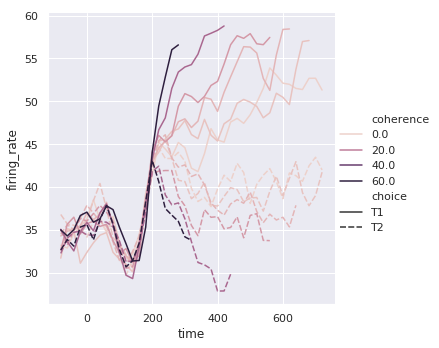

In [25]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

色相変数が数値であっても、線形カラースケールでは不十分に表現されることがあります。　　
この場合、色相変数のレベルは対数的にスケーリングされます。リストまたは辞書を渡すことで、各行に特定の色の値を指定できます。

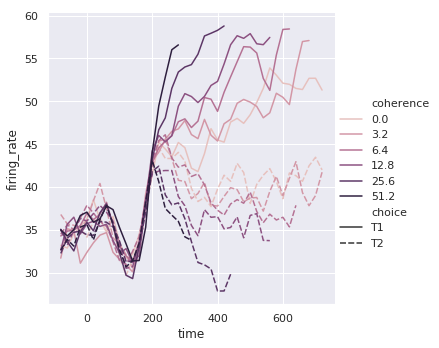

In [26]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

または、カラーマップの正規化方法を変更できます。

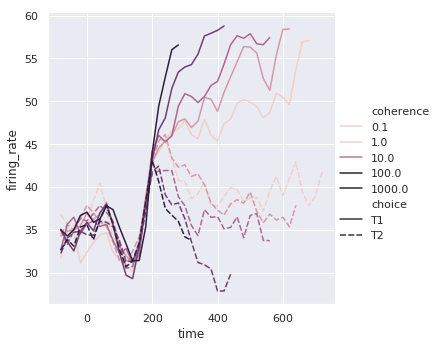

In [27]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

3番目の意味であるサイズは、行の幅を変更します。

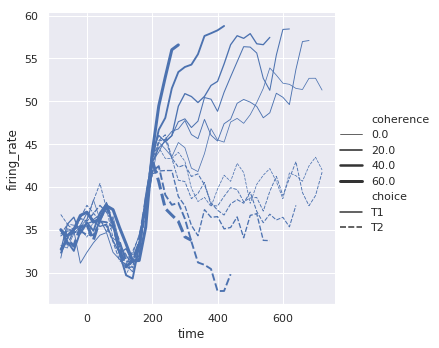

In [28]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);


サイズ変数は通常数値ですが、カテゴリ変数を線の幅にマッピングすることもできます。  

「太い」線と「細い」線よりもはるかに区別するのが難しいため、その際には注意してください。ただし、線に高頻度の変動がある場合、ダッシュは認識しにくい場合があるため、その場合は異なる幅を使用する方が効果的です。

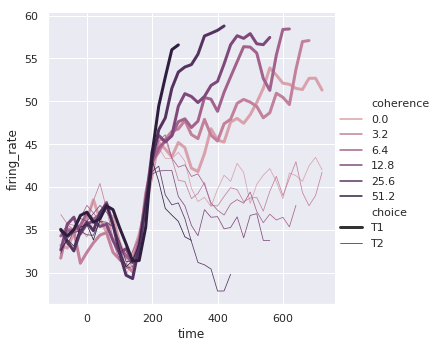

In [29]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

#### 日付データでプロットする
ラインプロットは、実際の日付と時刻に関連するデータを視覚化するためによく使用されます。  
これらの関数は、元の形式でデータを元のmatplotlib関数に渡します。  
したがって、目盛りラベルの日付を書式設定するmatplotlibの機能を利用できます。ただし、その書式設定はすべてmatplotlibレイヤーで行う必要があります。matplotlibのドキュメントを参照して、その動作を確認する必要があります。

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


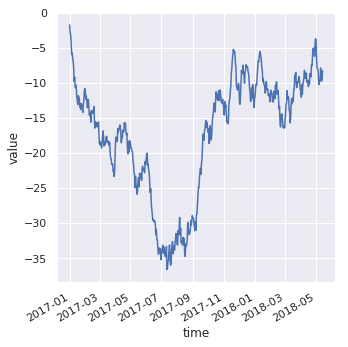

In [30]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### ファセットとの複数の関係の表示
このチュートリアルでは、これらの関数が一度に複数のセマンティック変数を表示できることを強調しましたが、常に有効であるとは限りません。  
しかし、2つの変数間の関係が他の複数の変数にどのように依存するかを理解したい場合はどうでしょうか。

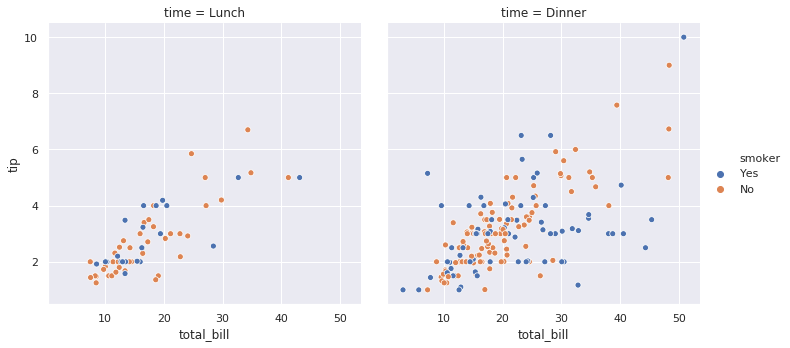

In [31]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

この方法で、2つの変数の影響を表示することもできます。1つは列をファセットし、  
もう1つは行をファセットすることです。グリッドにさらに変数を追加し始めると、図のサイズを小さくすることができます。   
FacetGridのサイズは、各ファセットの高さとアスペクト比によってパラメーター化されることに注意してください。

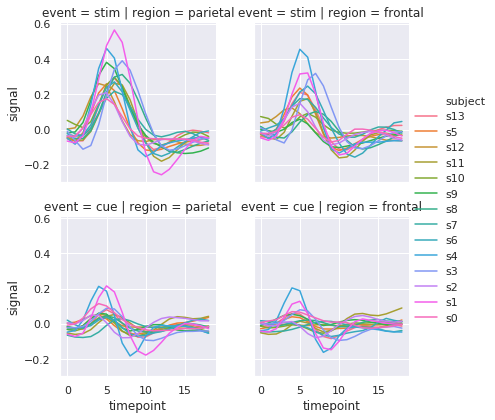

In [32]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

変数の多くのレベルで効果を調べたい場合、列でその変数をファセットし、ファセットを行に「ラップ」することをお勧めします。

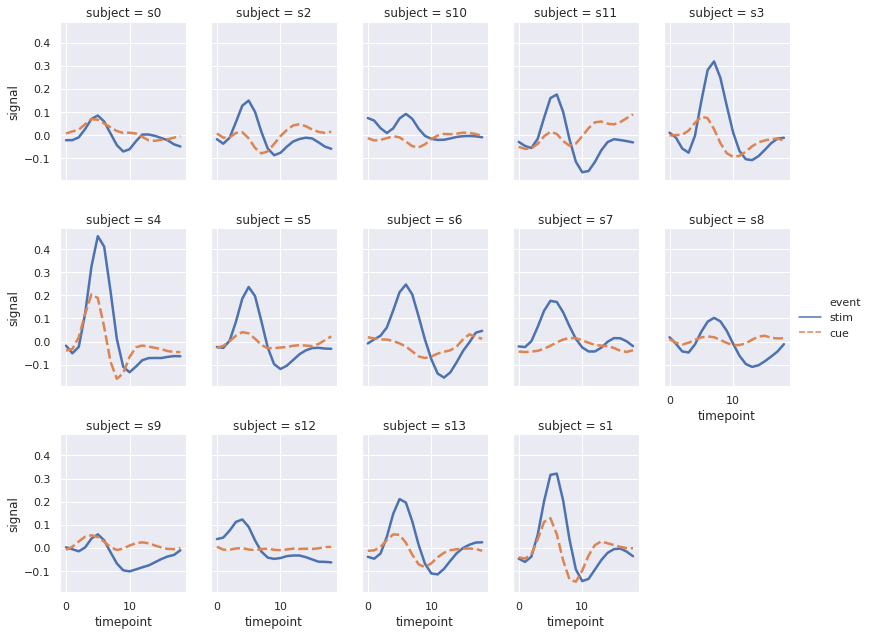

In [33]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

これらの視覚化はしばしば「格子」プロットまたは「小倍数」と呼ばれ、  
全体のパターンとそれらのパターンからの逸脱の両方を目で簡単に検出できる形式でデータを提示するため、非常に効果的です。  
scatterplot（）およびrelplot（）によって提供される柔軟性を利用する必要がありますが、いくつかの単純なプロットは通常、1つの複雑なプロットよりも効果的であることを常に念頭に置いてください。

# カテゴリカルデータを使用したプロット
リレーショナルプロットチュートリアルでは、異なる視覚表現を使用して、  
データセット内の複数の変数間の関係を示す方法を見ました。  
例では、主な関係が2つの数値変数の間である場合に焦点を当てました。主な変数の1つが「カテゴリ」（個別のグループに分割されている）である場合、視覚化により特化したアプローチを使用すると役立ちます。

Categorical scatterplots:

* stripplot() (with kind="strip"; the default)
* swarmplot() (with kind="swarm")

Categorical distribution plots:

* boxplot() (with kind="box")
* violinplot() (with kind="violin")
* boxenplot() (with kind="boxen")

Categorical estimate plots:

* pointplot() (with kind="point")
* barplot() (with kind="bar")
* countplot() (with kind="count")  




これらのファミリは、さまざまなレベルの粒度を使用してデータを表します。  
どちらを使用するかがわかったら、答えたい質問について考える必要があります。統合APIを使用すると、さまざまな種類を簡単に切り替えて、いくつかの観点からデータを表示できます。

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#### カテゴリカル散布図

catplot（）のデータのデフォルト表現では、散布図が使用されます。実際、seabornには2つの異なるカテゴリ散布図があります。カテゴリデータを散布図で表す際の主な課題を解決するためのさまざまなアプローチを採用しています。つまり、1つのカテゴリに属する​​すべてのポイントが、カテゴリ変数に対応する軸に沿った同じ位置にあります。 catplot（）のデフォルトの「種類」であるstripplot（）で使用されるアプローチは、少量のランダムな「ジッター」を使用して、カテゴリ軸上のポイントの位置を調整することです。

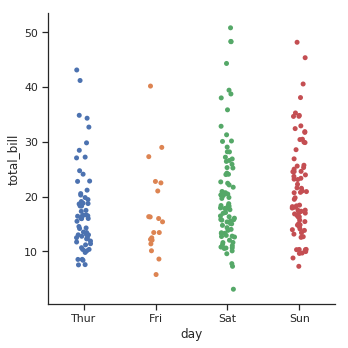

In [35]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

ジッタパラメータは、ジッタの大きさを制御するか、完全に無効にします。

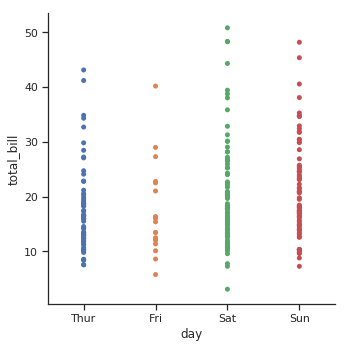

In [36]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

2番目のアプローチは、重複しないようにするアルゴリズムを使用して、  
カテゴリ軸に沿ってポイントを調整します。比較的小さなデータセットに対してのみ有効ですが、観測値の分布をより適切に表現できます。この種のプロットは「beeswarm」とも呼ばれ、sbornmplot（）によってseabornに描画されます。これは、catplot（）でkind = "swarm"を設定することでアクティブになります。

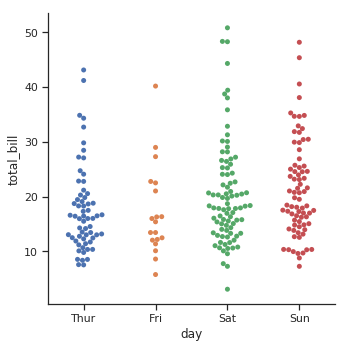

In [37]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

リレーショナルプロットと同様に、色相のセマンティックを使用して、カテゴリプロットに別の次元を追加することができます。  
（カテゴリプロットは現在、サイズまたはスタイルのセマンティクスをサポートしていません）。異なるカテゴリプロット関数はそれぞれ、色相のセマンティックを異なる方法で処理します。散布図の場合、ポイントの色を変更するだけです。

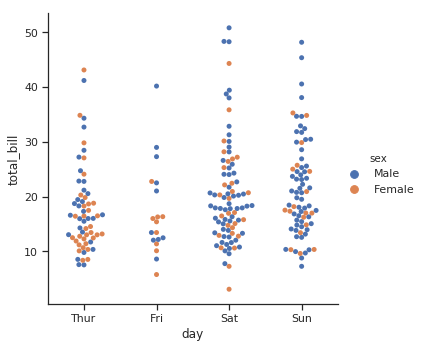

In [38]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

数値データとは異なり、カテゴリ変数のレベルをその軸に沿って順序付ける方法は必ずしも明らかではありません。  
一般に、シーボーンカテゴリカルプロット関数は、データからカテゴリの順序を推測しようとします。データにパンダカテゴリデータ型がある場合、カテゴリのデフォルトの順序をそこに設定できます。カテゴリ軸に渡された変数が数値に見える場合、レベルはソートされます。ただし、データはカテゴリとして扱われ、番号を使用してラベルを付ける場合でも、カテゴリ軸の順序位置（具体的には0、1、…）に描画されます。

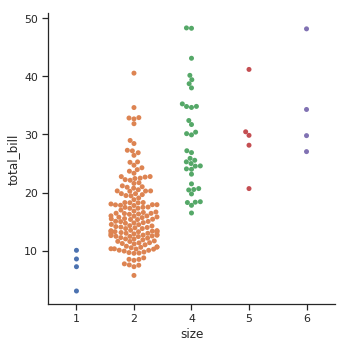

In [39]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

デフォルトの順序を選択するもう1つのオプションは、データセットに表示されるカテゴリのレベルを取得することです。  
順序は、orderパラメーターを使用して、プロット固有の基準で制御することもできます。これは、同じ図に複数のカテゴリプロットを描画するときに重要になることがあります。これについては、以下で詳しく説明します。

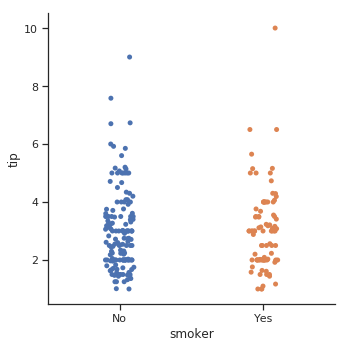

In [40]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

「カテゴリ軸」という考え方に言及しました。これらの例では、常に水平軸に対応しています。ただし、カテゴリ変数を縦軸に配置すると便利です（特に、カテゴリ名が比較的長い場合やカテゴリが多い場合）。これを行うには、軸への変数の割り当てを交換します。

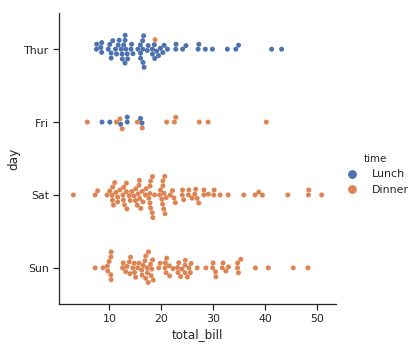

In [41]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

#### カテゴリ内の観測値の分布
データセットのサイズが大きくなると、カテゴリ別散布図は、各カテゴリ内の値の分布について提供できる情報が制限されます。これが発生した場合、カテゴリレベル全体で簡単に比較できるように分布情報を要約する方法がいくつかあります。

#### ボックスプロット
1つ目は、おなじみのboxplot（）です。この種類のプロットは、分布の3つの四分位値と極値を示しています。 「ウィスカ」は、下四分位および上四分位の1.5 IQR内にあるポイントまで拡張され、この範囲外の観測値は独立して表示されます。これは、箱ひげ図の各値がデータの実際の観測値に対応することを意味します。

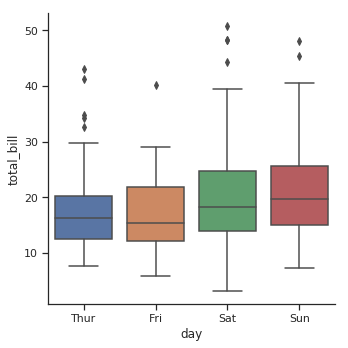

In [42]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

色相のセマンティックを追加する場合、セマンティック変数の各レベルのボックスはカテゴリ軸に沿って移動されるため、それらは重複しません。

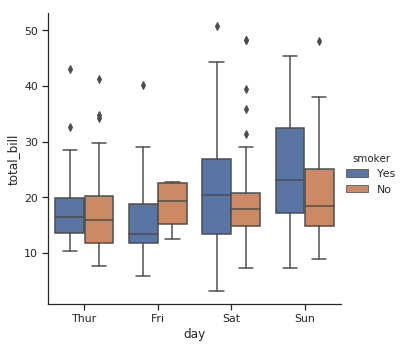

In [43]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

この動作は「回避」と呼ばれ、セマンティック変数がメインのカテゴリ変数内にネストされていると想定されるため、デフォルトでオンになっています。そうでない場合は、覆い焼きを無効にすることができます。

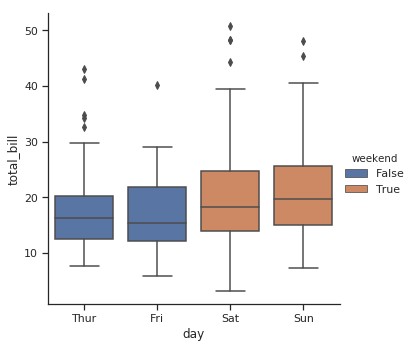

In [44]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

関連する関数boxenplot（）は、ボックスプロットに似ていますが、分布の形状に関する詳細情報を表示するために最適化されたプロットを描画します。大規模なデータセットに最適です。

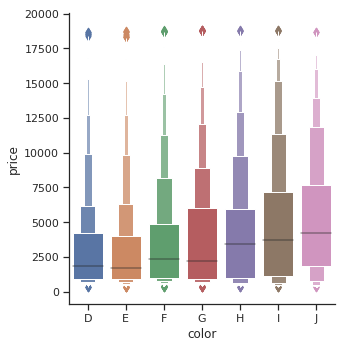

In [45]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

#### バイオリンプロット

別のアプローチはviolinplot（）です。これは、ボックスプロットと分布チュートリアルで説明されているカーネル密度推定手順を組み合わせたものです。

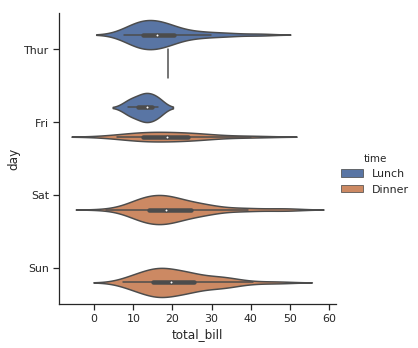

In [46]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

このアプローチでは、カーネル密度の推定値を使用して、値の分布をより詳細に記述します。さらに、箱ひげ図からの四分位数とウィーカー値はバイオリンの内側に表示されます。欠点は、バイオリンプロットがKDEを使用するため、微調整が必​​要な他のパラメーターがいくつかあり、単純なボックスプロットに比べて複雑さが増すことです。  

※カーネル密度推定（Kernel density estimation）はノンパラメトリックな確率密度関数の推定法

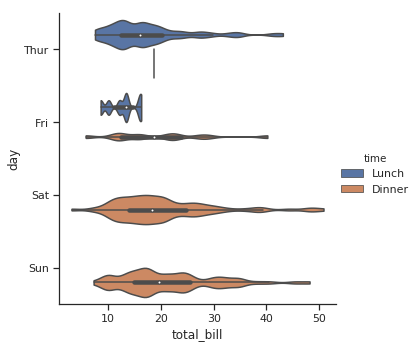

In [47]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

色相パラメーターのレベルが2つしかない場合は、バイオリンを「分割」することもできます。これにより、スペースをより効率的に使用できます。

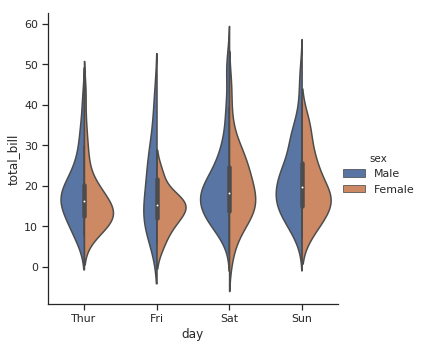

In [48]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

最後に、バイオリンの内部に描画されるプロットには、サマリーボックスプロット値の代わりに個々の観測値を表示する方法など、いくつかのオプションがあります。

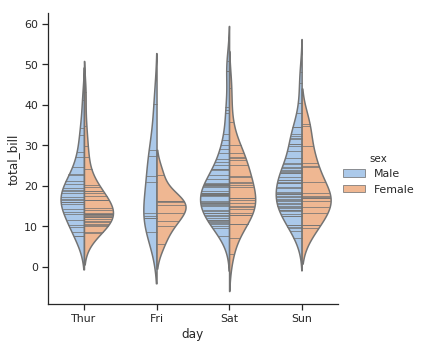

In [49]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

swarmplot（）またはstriplot（）をボックスプロットまたはバイオリンプロットと組み合わせて、分布の概要とともに各観測値を表示することも役立ちます。

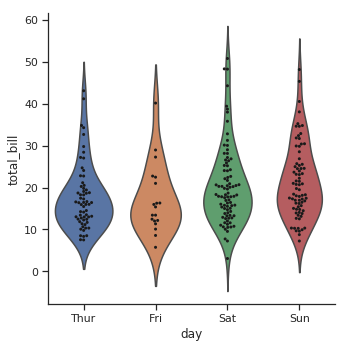

In [50]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# カテゴリ内の統計的推定
他のアプリケーションでは、各カテゴリ内の分布を表示するのではなく、値の中心傾向の推定値を表示することができます。   
Seabornには、この情報を表示する2つの主な方法があります。重要なことに、これらの関数の基本的なAPIは、上記で説明したものと同じです。

#### 棒グラフ
この目標を達成するおなじみのスタイルのプロットは、棒グラフです。 seabornでは、barplot（）関数は完全なデータセットで動作し、関数を適用して推定値を取得します（デフォルトで平均を取ります）。各カテゴリに複数の観測値がある場合、ブートストラップを使用して推定値の周りの信頼区間を計算し、エラーバーを使用してプロットします。

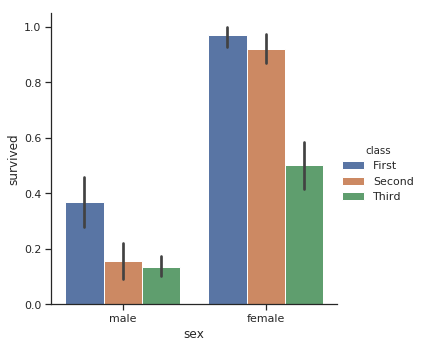

In [51]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

バープロットの特殊なケースは、2番目の変数の統計を計算するのではなく、各カテゴリの観測値の数を表示する場合です。これは、量的変数ではなく、カテゴリ変数上のヒストグラムに似ています。 seabornでは、countplot（）関数を使用して簡単に行うことができます。

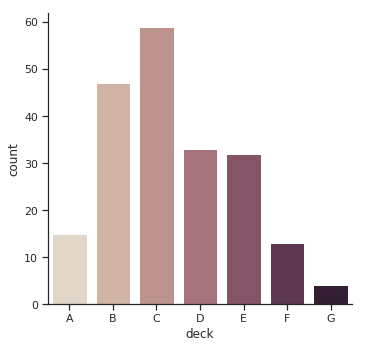

In [52]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

barplot（）とcountplot（）は両方とも、上記で説明したすべてのオプションとともに、各関数の詳細なドキュメントで示されている他のオプションとともに呼び出すことができます。

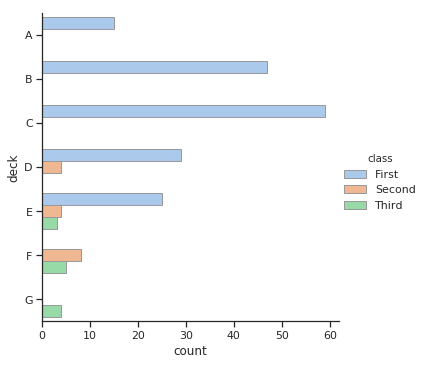

In [53]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);